# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [ ]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

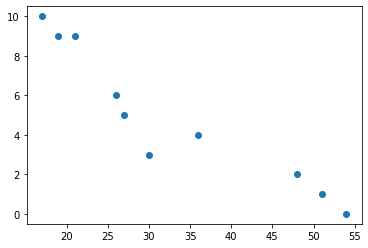

In [109]:
x = student_data[['Age']]
y = student_data['Tardies']

plt.scatter(x,y)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

yes, I see a trend. We can say that the younger students have a higher tendency to come to the bootcamp late than the much older students.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [110]:
# Your response here.
#correlation: 
student_data.corr()


#covariance:


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()



In [111]:
model.fit(x,y)

LinearRegression()

In [112]:
model.intercept_

12.888803363135771

In [113]:
model.coef_

array([-0.24282077])

In [114]:
x

,Age
0,17
1,51
2,27
3,21
4,36
5,48
6,19
7,26
8,54
9,30


Plot your regression model on your scatter plot.

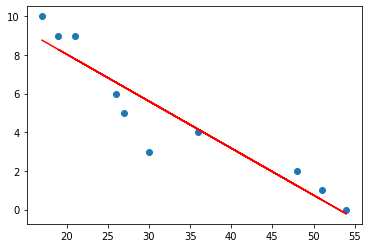

In [115]:
y_hat = model.intercept_ + model.coef_[0]*x

plt.plot(x, y_hat, c='red')
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [133]:
vehicles = pd.read_csv(r'C:\Users\Acer\OneDrive\Desktop\Labs\lab-regression-analysis\your-code\vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [135]:
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [144]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

In [145]:
model = linear_model.LinearRegression()


In [147]:
model.fit(X,y)

LinearRegression()

In [148]:
model.intercept_ 

769.8882836465637

In [149]:
model.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

ValueError: x and y must be the same size

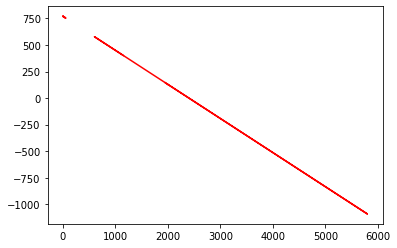

In [143]:
##y_hat = model.intercept_ + model.coef_[0]*x
y_hat1 = model.intercept_ + model.coef_[1]*x
y_hat 2= model.intercept_ + model.coef_[2]*x
y_hat3 = model.intercept_ + model.coef_[3]*x
y_hat4 = model.intercept_ + model.coef_[4]*x


##plt.plot(x, y_hat, c='red')
##plt.scatter(x,y)
##plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

A multi linear regression will best suite this question because we have so many variables trying to predict one ultimate outcome.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
import numpy as np


In [124]:
party_data = pd.DataFrame({'X': ['1','3','4','6','8','9','11','14'], 'Y':['1','2','4','4','5','7','8','13']})
party_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [125]:
x = party_data[['X']]
x

,X
0,1
1,3
2,4
3,6
4,8
5,9
6,11
7,14


In [126]:
y = party_data['Y']
y

0     1
1     2
2     4
3     4
4     5
5     7
6     8
7    13
Name: Y, dtype: object

In [127]:

model = linear_model.LinearRegression()

In [128]:
model.fit(x,y)

LinearRegression()

In [129]:
model.intercept_

-0.43939393939393945

In [130]:
model.coef_


array([0.84848485])

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [132]:
y_hat1 = model.intercept_ + model.coef_[0] * x

plt.plot(x, y_hat1, c='orange')
plt.scatter(x,y)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
